# Название проекта: Поиск тригеров активности среди доноров

## Первый взгляд и предобработка

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/user/JupiterIra/Yandex/Мастерская/1_предсказание частоты событий/data/data_blago_all.xlsx'
donors = pd.read_excel(path, sheet_name='Доноры')
donats = pd.read_excel(path, sheet_name='Пожертвования')

In [3]:
# Функция для просмотра данных в дф
def date_first_glampse(df):

    display('Несколько строк: ', df.sample(3))
    display('Общая информация: ')
    df.info()
    display('Дубликаты: ', df.duplicated().sum())
    for col in df.columns:
        display(f'Уникальные значения в колонке {col} и их количество: ', df[col].value_counts(dropna=False))

In [4]:
date_first_glampse(donors)

'Несколько строк: '

,ID,Пол,Город,Дата последней email активности
2957,6C5F6CBE-3A8E-47D7-842A-CDAE41FA9CC5,Женский ...,КАРДЫМОВО,NaT
2548,D2763A90-9800-4525-A8E3-B0ACF7021BB9,Женский ...,NaN,2022-07-18 16:29:49
2652,1A1115A1-469E-46CF-A85F-B7F2B08EA5D9,NaN,NaN,NaT


'Общая информация: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3683 non-null   object        
 1   Пол                              2431 non-null   object        
 2   Город                            1015 non-null   object        
 3   Дата последней email активности  1835 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 115.2+ KB


'Дубликаты: '

0

'Уникальные значения в колонке ID и их количество: '

899F90A6-7789-4D5D-BDFD-910E86042778    1
BD54E7F2-EB34-43E2-ADA9-8D39464CAFA0    1
C0BDFC0B-7193-498C-8EF5-624FDB8F0510    1
381A2117-21B6-4741-84D6-051E64E19B82    1
6E982161-5325-4B77-B466-BAFD56FED8E8    1
                                       ..
6D1D53B6-A99C-4845-90CD-718827A8DF40    1
4179E938-0E49-4FCA-B0FC-C89431C51852    1
AA17FC95-5B67-46B9-8175-AE7430FEE953    1
3E219A4C-1E4F-4019-A257-97C61569CFEA    1
5CFD4E98-5C20-4160-B2FD-FD07255CC707    1
Name: ID, Length: 3683, dtype: int64

'Уникальные значения в колонке Пол и их количество: '

Женский                                                                                                                                                                                                                                                       1874
NaN                                                                                                                                                                                                                                                           1252
Мужской                                                                                                                                                                                                                                                        557
Name: Пол, dtype: int64

'Уникальные значения в колонке Город и их количество: '

NaN                2668
Москва              458
Санкт-Петербург      78
Краснодар            23
Нижний Новгород      20
                   ... 
Antalya               1
Алексеевский          1
London                1
РЕШЕТНИКОВО           1
Бор                   1
Name: Город, Length: 235, dtype: int64

'Уникальные значения в колонке Дата последней email активности и их количество: '

NaT                    1848
2022-07-18 16:29:49     294
2022-07-18 16:29:48     229
2022-07-18 16:29:50     163
2022-07-18 16:29:47     114
                       ... 
2022-07-25 10:09:28       1
2022-05-18 12:26:22       1
2022-07-18 16:54:44       1
2022-07-21 20:42:34       1
2022-07-22 15:21:48       1
Name: Дата последней email активности, Length: 654, dtype: int64

In [5]:
date_first_glampse(donats)

'Несколько строк: '

,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
1418,BDAA50F8-8C5B-4D26-880C-54AE83C2FE01,2020-07-14 18:05:23,20.00,Нет ...,ПОЖЕРТВОВАНИЕ,Банковские карты
530,6505400F-647C-4D81-8F6A-279FBE8E1D88,2016-04-20 02:40:00,500.00,Да ...,Пожертвование в фонд помощи детям-отказникам и...,Банковские карты
3430,5CF651F9-81A5-4480-BD7C-4E734DE6D584,2021-12-27 20:31:21,500.00,Да ...,ПОЖЕРТВОВАНИЕ,Банковские карты


'Общая информация: '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14043 entries, 0 to 14042
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Donor ID            14043 non-null  object        
 1   Дата платежа        14043 non-null  datetime64[ns]
 2   Сумма платежа       14043 non-null  float64       
 3   Рекуррентный        14043 non-null  object        
 4   Назначение платежа  12774 non-null  object        
 5   Канал оплаты        14043 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 658.4+ KB


'Дубликаты: '

12

'Уникальные значения в колонке Donor ID и их количество: '

8A8DAECD-40B3-4A41-B53C-06A62BE672E6    83
F836F738-FB7E-4134-ABA8-B6E9CA1E71EA    76
0B6DA68C-558B-4153-806E-B1D775585B88    76
85348172-F358-4345-91F1-DB8CF0531C8A    73
4ECB767F-8830-497B-B395-851D4EACD1F8    65
                                        ..
9AD22244-3617-43A9-B734-52E18C8D93D7     1
2E6ECD79-CBC4-4C60-AD88-300599773394     1
A1FE77FC-10FD-45BD-BE33-3B7D6B78993B     1
B0CC21DF-467E-45BA-BACA-1B76BE784DF1     1
5CFD4E98-5C20-4160-B2FD-FD07255CC707     1
Name: Donor ID, Length: 3683, dtype: int64

'Уникальные значения в колонке Дата платежа и их количество: '

2021-04-12 00:00:00    9
2022-05-02 00:00:00    8
2022-07-18 00:00:00    8
2022-04-24 00:00:00    7
2021-06-16 00:00:00    7
                      ..
2021-03-25 15:48:54    1
2016-04-16 14:40:04    1
2021-12-25 09:13:51    1
2022-03-03 20:23:36    1
2019-04-28 20:04:13    1
Name: Дата платежа, Length: 13386, dtype: int64

'Уникальные значения в колонке Сумма платежа и их количество: '

500.00       3175
100.00       2470
300.00       1744
1,000.00     1743
200.00       1454
             ... 
27,108.00       1
661.00          1
0.69            1
8.65            1
188.00          1
Name: Сумма платежа, Length: 373, dtype: int64

'Уникальные значения в колонке Рекуррентный и их количество: '

Да                                                                                                                                                                                                                                                            8085
Нет                                                                                                                                                                                                                                                           5958
Name: Рекуррентный, dtype: int64

'Уникальные значения в колонке Назначение платежа и их количество: '

ПОЖЕРТВОВАНИЕ                                                                             3811
Пожертвование в фонд помощи детям-отказникам и детям-сиротам "Бюро Добрых Дел"            3335
ПОЖЕРТВОВАНИЕ  undefined                                                                  2162
NaN                                                                                       1269
Добровольное пожертвование. НДС не облагается                                              497
                                                                                          ... 
ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 100.00 руб.;Комиссия 0.00 руб;Дата оплаты 20/04/2021;       1
ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 450.00 руб.;Комиссия 0.00 руб;Дата оплаты 25/06/2021;       1
ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 200 руб.;Комиссия 0 руб;Дата оплаты 25/04/2019;             1
ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 30.00 руб.;Комиссия 0.00 руб;Дата оплаты 27/03/2022;        1
ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 500.00 руб.;Комис

'Уникальные значения в колонке Канал оплаты и их количество: '

Банковские карты                11204
SMS                              1474
Прямые поступления на счет       1362
Наличные в кассу                    3
Name: Канал оплаты, dtype: int64

In [6]:
# т.к. количество уникальных id равны, объединим таблицы в одну,
# предварительно переименовав столбец в donats

donats = donats.rename(columns={'Donor ID' : 'ID'})

df = donats.merge(donors, how='left', on = 'ID')
df.head()

,ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты,Пол,Город,Дата последней email активности
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.00,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,Москва,2022-06-03 20:15:57
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.00,Нет ...,SMS bdd,SMS,Женский ...,Москва,2022-07-18 17:19:02
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.00,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет,Мужской ...,NaN,NaT
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.00,Нет ...,NaN,SMS,NaN,NaN,NaT
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.00,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,NaN,2022-07-20 20:32:37


In [7]:
#приведем датасет к нижнему регистру
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [8]:
# переименуем столбцы, приведя их к змеиному регистру
df = df.rename(columns = 
              {
                  'ID':'id',
                  'Дата платежа':'date',
                  'Сумма платежа':'sum',
                  'Пол':'gender',
                  'Город':'city',
                  'Назначение платежа' : 'purpose',
                  'Рекуррентный' : 'is_reccurent',
                  'Канал оплаты' : 'channel',
                  'Дата последней email активности': 'last_email_activity'
                  
              }
              )
df.columns

Index(['id', 'date', 'sum', 'is_reccurent', 'purpose', 'channel', 'gender',
       'city', 'last_email_activity'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14043 entries, 0 to 14042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   14043 non-null  object        
 1   date                 14043 non-null  datetime64[ns]
 2   sum                  14043 non-null  float64       
 3   is_reccurent         14043 non-null  object        
 4   purpose              12773 non-null  object        
 5   channel              14043 non-null  object        
 6   gender               12473 non-null  object        
 7   city                 6738 non-null   object        
 8   last_email_activity  11073 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.1+ MB


In [10]:
# удалим дубликаты
df = df.drop_duplicates()

Посмотрим на данные в каждой колонке

In [11]:
for col in df.columns:
    display(df[col].describe(datetime_is_numeric=True).to_frame())

,id
count,14031
unique,3683
top,8a8daecd-40b3-4a41-b53c-06a62be672e6
freq,83


,date
count,14031
mean,2020-02-19 09:11:59.707148544
min,2015-07-19 20:10:11
25%,2019-04-26 17:42:16
50%,2020-06-27 01:47:20
75%,2021-07-02 17:22:50.500000
max,2022-07-28 19:22:15


,sum
count,"14,031.00"
mean,"1,722.30"
std,"29,512.34"
min,0.01
25%,150.00
50%,350.00
75%,700.00
max,"3,000,000.00"


,is_reccurent
count,14031
unique,2
top,да ...
freq,8085


,purpose
count,12761
unique,879
top,пожертвование
freq,3822


,channel
count,14031
unique,4
top,банковские карты
freq,11204


,gender
count,12462
unique,2
top,женский ...
freq,9674


,city
count,6737
unique,228
top,москва
freq,3643


,last_email_activity
count,11073
mean,2022-07-01 19:46:36.917456896
min,2020-01-30 11:41:46
25%,2022-07-18 16:29:47
50%,2022-07-18 16:29:48
75%,2022-07-18 17:41:36
max,2022-07-28 20:34:28


In [12]:
df['payment_date'] = df['date'].dt.date
df['payment_time'] = df['date'].dt.time
df['payment_year'] = df['date'].dt.year
df['payment_month'] = df['date'].dt.month
df['payment_day_of_week'] = df['date'].dt.weekday
df['last_email_activity'] = df['last_email_activity'].dt.date

df = df.drop('date',axis=1)
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week
6862,7680ff13-fea5-441c-afaf-5294ae2ff99d,"1,000.00",нет ...,на обучение дарьи,банковские карты,мужской ...,москва,2022-07-18,2021-12-30,13:20:46,2021,12,3
13623,414613c0-8aec-455b-a5f4-c9731c9e6e18,200.00,да ...,пожертвование,банковские карты,женский ...,ярославль,2022-07-20,2022-07-20,14:36:46,2022,7,2
10255,f726e7c0-e8c5-4264-9f8f-58c8bcac73b6,"1,000.00",да ...,пожертвование undefined,банковские карты,женский ...,москва,2022-07-18,2022-06-01,12:57:51,2022,6,2


In [13]:
#Заполним пропуски
for col in ['purpose','gender','city','last_email_activity']:
    df[col] = df[col].fillna('no_info')

In [14]:
df.isna().sum()

id                     0
sum                    0
is_reccurent           0
purpose                0
channel                0
gender                 0
city                   0
last_email_activity    0
payment_date           0
payment_time           0
payment_year           0
payment_month          0
payment_day_of_week    0
dtype: int64

In [15]:
df['is_reccurent'].unique()

array(['да                                                                                                                                                                                                                                                        ',
       'нет                                                                                                                                                                                                                                                       '],
      dtype=object)

In [16]:
df['is_reccurent'] = df['is_reccurent'].replace({'нет                                                                                                                                                                                                                                                       ':
                                                 0, 
                                                 'да                                                                                                                                                                                                                                                        ':
                                                 1})
df['is_reccurent'].unique()

array([1, 0], dtype=int64)

In [17]:
df['gender'].unique()

array(['женский                                                                                                                                                                                                                                                   ',
       'мужской                                                                                                                                                                                                                                                   ',
       'no_info'], dtype=object)

In [18]:
df['is_woman'] = df['gender'].replace({'мужской                                                                                                                                                                                                                                                   ':
                                     0, 
                                    'женский                                                                                                                                                                                                                                                   ':
                                    1,
                                      'no_info':'no_info'})
df['is_woman'].unique()

array([1, 0, 'no_info'], dtype=object)

In [19]:
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman
3858,a07a7972-65c5-434e-9df3-eb81c20dada3,200.00,0,no_info,sms,no_info,no_info,no_info,2019-10-21,19:58:43,2019,10,0,no_info
5393,67bed449-3429-4190-aa55-df8267b7a196,"2,500.00",1,пожертвование клуб друзей,банковские карты,мужской ...,мытищи,2022-07-18,2021-02-01,14:41:37,2021,2,0,0
3752,871f7a54-58a2-4aea-bd93-4bd4b6ac0d95,300.00,0,пожертвование,банковские карты,женский ...,санкт-петербург,2022-07-18,2020-09-03,16:37:21,2020,9,3,1


## EDA

<AxesSubplot:xlabel='payment_year'>

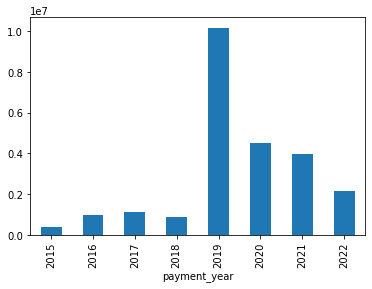

In [20]:
df.groupby('payment_year')['sum'].sum().plot(kind='bar')

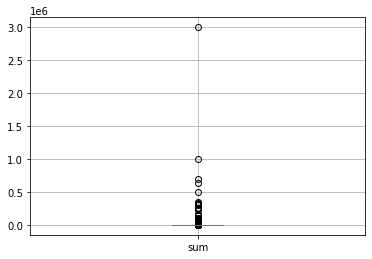

In [21]:
df.boxplot('sum');

In [22]:
# Посмотрим всегда ли у пользователя рекурентные платежи, 

print('количество пользователей с разными видами платежей ',
      len(df.groupby('id')['is_reccurent'].nunique()[df.groupby('id')['is_reccurent'].nunique()>1]))

# сохраним id тех, кто платил разными способами в users_with_diff_types_payments
users_with_diff_types_payments = (
    df.groupby('id')['is_reccurent'].
    nunique()[df.groupby('id')['is_reccurent'].nunique()>1].
    index.to_list()
)

количество пользователей с разными видами платежей  137


In [23]:
# Лайфтайм
df = df.sort_values(by='payment_date')
df['life_time'] = df.groupby('id')['payment_date'].apply(lambda x: x.diff().abs().fillna(pd.Timedelta(0)))
df['life_time'] = df['life_time'].dt.days.astype('int')
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman,life_time
10169,5849030f-137b-4cb2-86a7-66c60f593901,400.00,0,no_info,sms,no_info,no_info,2020-05-15,2019-08-06,01:24:33,2019,8,1,no_info,0
8297,668758e1-da8b-46ab-88f8-172994ca0f58,500.00,1,пожертвование в фонд помощи детям-отказникам и...,банковские карты,женский ...,no_info,2022-07-18,2016-11-05,10:55:00,2016,11,5,1,32
5154,b4b87b93-26f3-4cd3-b88e-cd7278b9c4b6,"1,144.00",0,добровольное пожертвование. ндс не облагается,прямые поступления на счет,женский ...,no_info,no_info,2022-06-13,00:00:00,2022,6,0,1,0


In [24]:
df['is_delta_lifetime_neg_or_0'] = df.groupby('id')['life_time'].apply(lambda x: x.diff().fillna(0))
df['is_delta_lifetime_neg_or_0'] = df['is_delta_lifetime_neg_or_0'].apply(lambda x: 1 if x<=0 else 0)

df['is_delta_sum_pos_or_0'] = df.groupby('id')['sum'].apply(lambda x: x.diff().fillna(0))
df['is_delta_sum_pos_or_0'] = df['is_delta_sum_pos_or_0'].apply(lambda x: 1 if x>=0 else 0)

df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman,life_time,is_delta_lifetime_neg_or_0,is_delta_sum_pos_or_0
8514,0fd09c49-8be7-45b0-b496-060ef16a2182,100.00,1,пожертвование,банковские карты,женский ...,москва,2022-07-18,2020-03-27,08:20:53,2020,3,4,1,23,0,1
10198,22813b2c-bf74-43b0-b6fb-1414a3db1ddc,"7,896.00",1,пожертвование в фонд помощи детям-отказникам и...,банковские карты,мужской ...,no_info,no_info,2015-07-30,18:48:05,2015,7,3,0,0,1,1
9298,5f0d17aa-c0c4-4d65-8349-a8b574d3ff6e,300.00,0,пожертвование на обучение артёма,банковские карты,женский ...,no_info,2022-07-18,2019-07-29,10:54:39,2019,7,0,1,0,1,1


In [25]:
df[df['id']=='cdef2137-d5f3-434e-bc9f-e219ef43f8c5'][['payment_date','life_time','is_delta_lifetime_neg_or_0',
                                                      'sum','is_delta_sum_pos_or_0']]

,payment_date,life_time,is_delta_lifetime_neg_or_0,sum,is_delta_sum_pos_or_0
2307,2018-09-15,0,1,200.00,1
6699,2018-10-15,30,0,200.00,1
11562,2018-11-15,31,0,200.00,1
7681,2018-12-15,30,1,200.00,1
934,2021-05-06,873,0,"1,000.00",1
8155,2021-05-12,6,1,"4,000.00",1
5001,2021-05-23,11,0,"5,000.00",1
8591,2021-06-04,12,0,"4,875.00",0
2277,2021-06-06,2,1,"1,000.00",0
11662,2021-07-06,30,0,"5,000.00",1


In [26]:
#sns.pairplot(df);

In [27]:
#users_id_by_year = {}
#for year in df.payment_year.unique():    
#    users_id_by_year[year] = df.query('payment_year==@year')['id'].unique()

In [28]:
#for year in df.payment_year.unique():
#    users_id_by_year.get(year)

In [29]:
#q1_limit_high_sum = df['sum'].quantile(0.25)
#q3_limit_high_sum = df['sum'].quantile(0.75)
#iqr_sum = q3_limit_high_sum - q1_limit_high_sum # iqr
    
# границы верхнего интервала наиболее вероятных значений
#limit_high_sum = q3_limit_high_sum + 1.5 * iqr_sum

#limit_high_sum

In [30]:
#users_sum_max = df[df['sum']>limit_high_sum].sort_values(by='sum', ascending=False)

In [31]:
#users_sum_ok = df[df['sum']<=limit_high_sum].sort_values(by='sum')

In [32]:
df['purpose'].value_counts().sample(5)

добровольное пожертвование;сумма 100 руб.;комиссия 0 руб;дата оплаты 18/07/2019;          1
добровольное пожертвование;сумма 100 руб.;комиссия 0 руб;дата оплаты 27/10/2020;          1
добровольное пожертвование;детям;сумма 500 руб.;комиссия 0 руб;дата оплаты 12/06/2019;    1
добровольное пожертвование;сумма 500.00 руб.;комиссия 0.00 руб;дата оплаты 05/03/2021;    1
добровольное пожертвование;сумма 92.73 руб.;комиссия 0 руб;дата оплаты 11/06/2019;        1
Name: purpose, dtype: int64

In [33]:
# доля назначений пожертвований
(df['purpose'].value_counts()/len(df['id'])).head(40)

пожертвование                                                                                                       0.27
пожертвование в фонд помощи детям-отказникам и детям-сиротам "бюро добрых дел"                                      0.24
пожертвование  undefined                                                                                            0.15
no_info                                                                                                             0.09
добровольное пожертвование. ндс не облагается                                                                       0.04
sms bdd                                                                                                             0.02
пожертвование клуб друзей                                                                                           0.01
на психологические консультации артёму                                                                              0.01
пожертвование без назначения    

In [34]:
def purose_category(purpose):
    
    if 'фонд' in purpose.loc['purpose']:
        return 'на работу фонда'
    elif 'no_info' in purpose.loc['purpose']:
        return 'no_info'
    elif 'программ' in purpose.loc['purpose']:
        return 'на программу'
    else:
        return 'адресное пожертвование'


# применим функцию
df['purpose'] = df['purpose'].fillna('no_info')
df['purpose'] = df.apply(purose_category, axis=1)
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman,life_time,is_delta_lifetime_neg_or_0,is_delta_sum_pos_or_0
11842,289c62f9-4e14-4444-83a5-8342880fe105,500.00,0,адресное пожертвование,банковские карты,женский ...,no_info,2022-07-18,2020-03-11,22:31:48,2020,3,2,1,0,1,1
5901,8dceb1c4-26b6-4d6a-bb79-e8d59fbf81fa,500.00,1,на работу фонда,банковские карты,мужской ...,no_info,2022-07-18,2018-09-24,18:15:01,2018,9,0,0,31,1,1
5506,13b7dcc2-6105-4a9a-afe5-0c4f24ec4a2d,"1,000.00",1,адресное пожертвование,банковские карты,женский ...,москва,2022-07-20,2020-12-25,18:29:22,2020,12,4,1,0,1,1


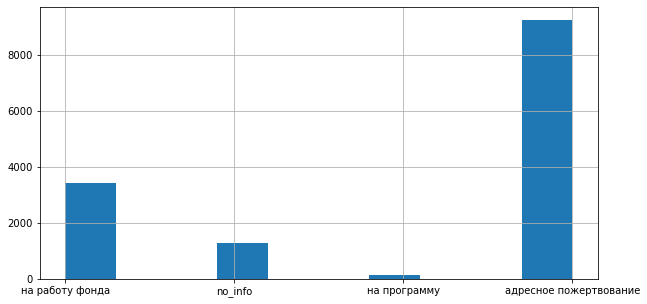

In [35]:
df['purpose'].hist(figsize=(10,5));

In [36]:
# доля каналов пожертвований
(df['channel'].value_counts()/len(df['id'])).head(40)

банковские карты               0.80
sms                            0.11
прямые поступления на счет     0.10
наличные в кассу               0.00
Name: channel, dtype: float64

In [37]:
# доля каналов пожертвований
(df['city'].value_counts()/len(df['id'])).head(40)

no_info              0.52
москва               0.26
санкт-петербург      0.04
краснодар            0.02
якутск               0.01
екатеринбург         0.01
мытищи               0.01
самара               0.01
frankfurt am main    0.01
ростов-на-дону       0.01
изобильный           0.01
сочи                 0.01
нижний новгород      0.01
одинцово             0.01
брянск               0.00
воронеж              0.00
казань               0.00
charleston           0.00
саратов              0.00
владивосток          0.00
ставрополь           0.00
новосибирск          0.00
курган               0.00
рязань               0.00
каменск-шахтинский   0.00
новороссийск         0.00
helsinki             0.00
кемерово             0.00
уфа                  0.00
ульяновск            0.00
нижневартовск        0.00
усть-илимск          0.00
волгоград            0.00
ярославль            0.00
старый оскол         0.00
вологда              0.00
san jose             0.00
красногорск          0.00
алупка      

In [38]:
# Сколько разных городов
len(df['city'].value_counts())

229

In [39]:
# Сколько пользователей с больше чем 1 города
df.groupby('id')['city'].agg(['unique','nunique']).query('nunique>1')

,unique,nunique
id,,


In [40]:
df['is_city_mentioned'] = df['city'].apply(lambda x: 0 if x=='no_info' else 1)

In [41]:
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman,life_time,is_delta_lifetime_neg_or_0,is_delta_sum_pos_or_0,is_city_mentioned
8760,cbab3a74-b9ed-414c-9b70-ea90fd63f812,100.00,1,на работу фонда,банковские карты,мужской ...,no_info,2022-07-18,2020-02-08,19:49:31,2020,2,5,0,31,1,1,0
12579,193fbef8-9c3e-4581-bbdf-a5d3ef653ae1,500.00,1,на работу фонда,банковские карты,мужской ...,москва,2022-07-18,2020-06-23,15:56:27,2020,6,1,0,31,0,1,1
4859,b66c344d-dd40-4773-b9d1-afc112f27b63,500.00,1,адресное пожертвование,банковские карты,мужской ...,москва,2022-07-18,2021-10-10,13:08:47,2021,10,6,0,30,1,1,1


In [42]:
df_for_model = df[['id', 'sum', 'is_reccurent', 'purpose', 
                   'payment_date', 'life_time',
                   'is_delta_lifetime_neg_or_0', 'is_delta_sum_pos_or_0']]

In [43]:
df_for_model = df_for_model.groupby('id').agg({'sum':'sum',
                                        'life_time':'median',
                                        'is_reccurent':'mean',
                                        'purpose':'nunique',
                                        'payment_date':'nunique',
                                        'is_delta_lifetime_neg_or_0':'mean',
                                        'is_delta_sum_pos_or_0':'mean'})

df_for_model.columns = ['total_sum','median_life_time',
                        'is_reccurent_mean','different_purposes_count',
                        'payments_count','delta_lifetime_decrease_mean',
                        'delta_sum_increase_mean']
df_for_model

,total_sum,median_life_time,is_reccurent_mean,different_purposes_count,payments_count,delta_lifetime_decrease_mean,delta_sum_increase_mean
id,,,,,,,
0001afdd-94e3-48f3-b5e7-d5539700425e,100.00,0.00,0.00,1,1,1.00,1.00
000711b2-2785-461b-bf5b-5cb7d2caba20,"10,500.00",31.00,1.00,1,21,0.52,1.00
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,400.00,0.00,0.00,1,1,1.00,1.00
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,"1,000.00",0.00,0.00,1,1,1.00,1.00
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,200.00,0.00,0.00,1,1,1.00,1.00
...,...,...,...,...,...,...,...
ff946fd1-eef8-4541-a906-bae64527aaa5,50.00,0.00,0.00,1,1,1.00,1.00
ffa30123-a516-44a7-b030-f83ed369b645,"4,100.00",23.00,0.96,1,26,0.56,0.63
ffb1c4fa-f950-4bb7-a1f2-9dd655298fff,100.00,0.00,0.00,1,1,1.00,1.00


In [44]:
df.columns

Index(['id', 'sum', 'is_reccurent', 'purpose', 'channel', 'gender', 'city',
       'last_email_activity', 'payment_date', 'payment_time', 'payment_year',
       'payment_month', 'payment_day_of_week', 'is_woman', 'life_time',
       'is_delta_lifetime_neg_or_0', 'is_delta_sum_pos_or_0',
       'is_city_mentioned'],
      dtype='object')

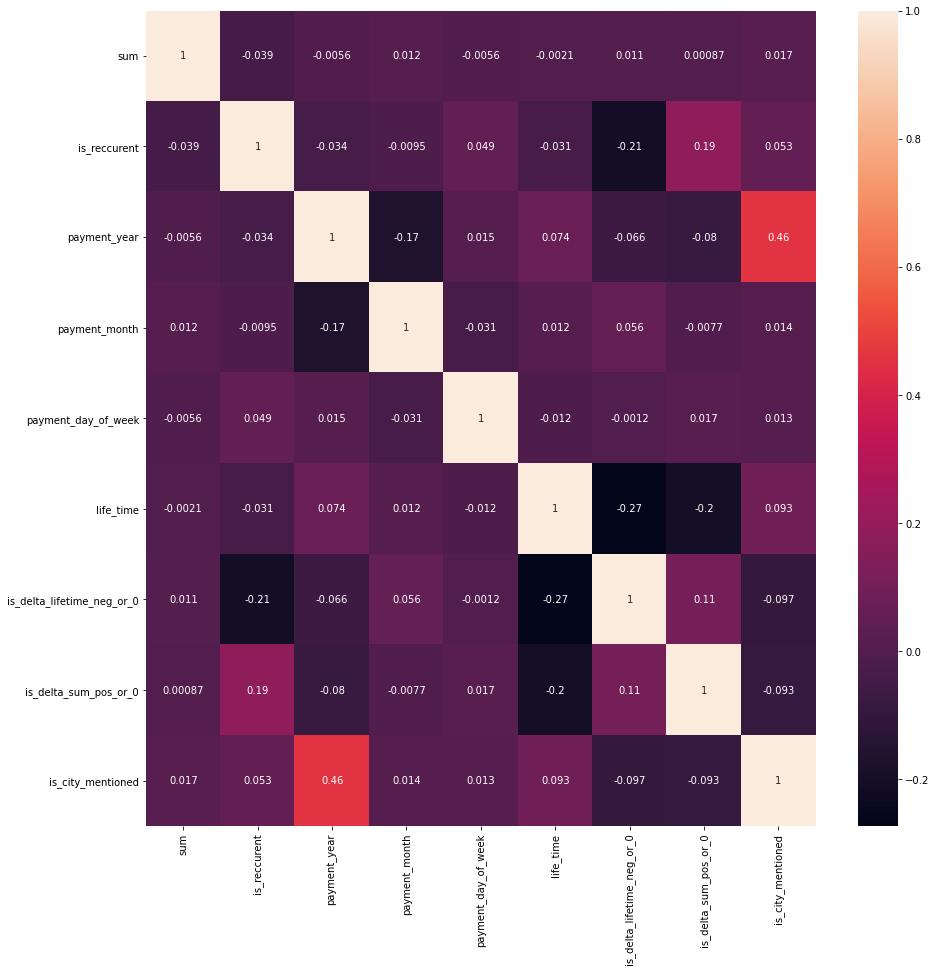

In [45]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

In [46]:
df_by_users = df.groupby('id').agg({'sum':'sum',
                                    'life_time':'median',
                                    'is_reccurent':'mean', 
                                    'is_woman':'first',
                                    'is_city_mentioned':'first', 
                                    'purpose':('nunique','unique'),
                                    'channel':'first',
                                    'last_email_activity':'nunique', 
                                    'payment_date':'nunique', 
                                    'payment_year':'nunique'}).reset_index()

In [47]:
df_by_users.sample(3)

id      sum life_time is_reccurent  \
                                                sum    median         mean   
1007  47532128-db6d-4ab9-ad07-97c5a7ce0690 1,030.00     17.50         0.00   
14    012dfc9b-bf39-40bc-987a-f02eeed039a9   300.00      0.00         0.00   
2059  8e41a57b-34c3-4379-b4ed-fd491245ab76   100.00      0.00         0.00   

     is_woman is_city_mentioned purpose                            \
        first             first nunique                    unique   
1007        0                 0       1  [адресное пожертвование]   
14    no_info                 0       1                 [no_info]   
2059  no_info                 0       1  [адресное пожертвование]   

                           channel last_email_activity payment_date  \
                             first             nunique      nunique   
1007  прямые поступления на счет                     1            2   
14                           sms                     1            1   
2059                         sms                     1            1   

     payment_year  
          nunique  
1007            1  
14              1  
2059            1

In [48]:
df_by_users.columns.values

array([('id', ''), ('sum', 'sum'), ('life_time', 'median'),
       ('is_reccurent', 'mean'), ('is_woman', 'first'),
       ('is_city_mentioned', 'first'), ('purpose', 'nunique'),
       ('purpose', 'unique'), ('channel', 'first'),
       ('last_email_activity', 'nunique'), ('payment_date', 'nunique'),
       ('payment_year', 'nunique')], dtype=object)

In [49]:
cols = {('id', ''):'id',
        ('sum', 'sum'):'total_sum',
        ('life_time', 'median'):'median_lifetime',
        ('is_reccurent', 'mean'):'mean_reccurent',
        ('is_woman', 'first'):'is_woman',
        ('is_city_mentioned', 'first'):'is_city_mentioned',
        ('purpose', 'nunique') : 'nunique_purpose',
        ('purpose', 'unique'):'unique_purpose',
        ('channel', 'first') : 'channel',
        ('last_email_activity', 'nunique') : 'nunique_email_activity',
        ('payment_date', 'nunique'): 'nunique_payment_date',
        ('payment_year', 'nunique'): 'nunique_payment_year'}

df_by_users.columns = [cols.get(x, x) for x in df_by_users.columns]
df_by_users.sample(3)

,id,total_sum,median_lifetime,mean_reccurent,is_woman,is_city_mentioned,nunique_purpose,unique_purpose,channel,nunique_email_activity,nunique_payment_date,nunique_payment_year
3046,d4636087-c627-4713-a09b-de0e0afde389,500.00,0.00,0.00,no_info,0,1,[адресное пожертвование],sms,1,1,1
3313,e6ede651-ea1d-432e-8f8d-1413f849bd6f,"13,500.00",31.00,1.00,1,0,1,[на работу фонда],банковские карты,1,27,3
2460,aaf5b358-9084-4126-9416-dcfb85a0542f,"1,000.00",0.00,0.00,1,0,1,[адресное пожертвование],прямые поступления на счет,1,1,1


In [50]:
df_by_users[df_by_users['nunique_purpose']>1]

,id,total_sum,median_lifetime,mean_reccurent,is_woman,is_city_mentioned,nunique_purpose,unique_purpose,channel,nunique_email_activity,nunique_payment_date,nunique_payment_year
39,0357f974-9460-450d-bb99-452083c08bbb,"1,500.00",284.00,0.00,1,0,2,"[на программу, адресное пожертвование]",банковские карты,1,2,2
43,0389a57d-f570-4cae-9e32-24c4dc953bc9,"5,500.00",555.50,0.00,1,0,2,"[на работу фонда, адресное пожертвование]",банковские карты,1,2,2
58,05343f01-7d7a-4147-8ece-74f6f8da69a8,"37,300.00",20.00,0.58,1,1,2,"[no_info, адресное пожертвование]",sms,1,41,4
92,07923dbb-392d-4448-8117-e769f52aa476,"20,300.00",31.00,0.91,1,0,3,"[на работу фонда, на программу, адресное пожер...",банковские карты,1,34,5
110,0887d875-22ba-4d77-896f-451159b6ce0a,"16,500.00",31.00,0.88,1,0,2,"[на работу фонда, адресное пожертвование]",банковские карты,1,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3490,f2a97d13-fe22-4584-94da-c15ae6239773,"1,500.00",1.00,0.00,1,0,2,"[на работу фонда, на программу]",банковские карты,1,3,2
3496,f2f53575-2d7c-487b-b991-30d991af55b9,"46,000.00",111.00,0.00,0,1,2,"[на программу, адресное пожертвование]",банковские карты,1,5,2
3515,f3b8b0e7-9544-4a2d-9a44-2c415046e3e9,"1,300.00",71.50,0.00,1,0,2,"[адресное пожертвование, no_info]",банковские карты,1,2,1
3600,f90d9e2d-f6bf-4cdc-add8-8845ab3a83be,"3,000.00",13.00,0.00,0,1,2,"[на работу фонда, адресное пожертвование]",банковские карты,1,3,1


In [51]:
df_by_users = df_by_users[df_by_users['is_woman']!='no_info']

In [52]:
df.groupby('id')['life_time'].describe().sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
0001afdd-94e3-48f3-b5e7-d5539700425e,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
9b5b5754-8aeb-4f7f-bd51-93871c704ba0,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
9b646ffb-068c-4f1c-9922-10d341765fb7,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
9b71189a-df64-421b-87db-759ee66d2cf6,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
9b7453c4-6d04-4a9a-bac2-f3036280fd49,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
4ecb767f-8830-497b-b395-851d4eacd1f8,65.00,31.22,16.37,0.00,29.00,30.00,31.00,130.00
85348172-f358-4345-91f1-db8cf0531c8a,73.00,24.18,128.72,0.00,0.00,4.00,16.00,"1,105.00"
f836f738-fb7e-4134-aba8-b6e9ca1e71ea,76.00,7.64,2.58,0.00,7.00,7.00,7.00,21.00


In [53]:
df.groupby(['id','payment_date'])['sum'].sum().reset_index()

,id,payment_date,sum
0,0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26,100.00
1,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27,500.00
2,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-04-29,500.00
3,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-05-28,500.00
4,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-07-27,500.00
...,...,...,...
13619,ffb1c4fa-f950-4bb7-a1f2-9dd655298fff,2019-04-26,100.00
13620,ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7,2021-08-29,20.00
13621,ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7,2021-09-13,20.00
13622,ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7,2021-09-19,20.00


In [54]:
df['life_time_group'] = pd.qcut(df['life_time'], [0, .33, .66, 1.], labels=[1, 2, 3])
df['sum_group'] = pd.qcut(df['sum'], [0, .25, .5, .75, 1.], labels=[1, 2, 3, 4])
df.sample(3)

,id,sum,is_reccurent,purpose,channel,gender,city,last_email_activity,payment_date,payment_time,payment_year,payment_month,payment_day_of_week,is_woman,life_time,is_delta_lifetime_neg_or_0,is_delta_sum_pos_or_0,is_city_mentioned,life_time_group,sum_group
7127,f752a667-cc6b-4d97-8beb-bf07df58ff6f,200.00,0,no_info,sms,no_info,no_info,no_info,2019-05-14,21:07:55,2019,5,1,no_info,0,1,1,0,1,2
25,0fd09c49-8be7-45b0-b496-060ef16a2182,300.00,0,адресное пожертвование,банковские карты,женский ...,москва,2022-07-18,2020-03-04,06:57:50,2020,3,2,1,6,1,1,1,1,2
11467,4112bfd7-78a1-48d3-9585-97d05b1d920e,"1,000.00",1,адресное пожертвование,банковские карты,женский ...,москва,2022-07-18,2021-08-04,11:04:00,2021,8,2,1,31,0,1,1,2,4


In [55]:
df.query('life_time == 0').groupby('id')['id'].count()[df.query('life_time == 0').groupby('id')['id'].count()>1]

id
0015a100-2d8c-4262-a9b3-bb1461c0c8b8    2
0329cf14-1f5b-4776-9a2a-5236b02cf6ac    2
0477632c-6b6f-490e-9245-12c7f6b04757    3
05343f01-7d7a-4147-8ece-74f6f8da69a8    5
056f2327-74d9-4edb-b891-272959834907    2
                                       ..
f6330b96-82fa-4f85-b1e8-cdf560b72b10    5
f7f24b47-3341-49eb-90d4-ac2e8f4fb320    7
fa587aeb-c2ed-4a79-9c2c-8fe53ee2f24f    2
fd7388f4-d9b2-4567-8995-e1ba5c0e3ba9    3
ffa30123-a516-44a7-b030-f83ed369b645    2
Name: id, Length: 191, dtype: int64

In [56]:
# Пользователи, у которых есть переход из одной группы частоты платежа в другую
users_diff_interval = df.groupby('id')['life_time_group'].agg(['unique','nunique']).query('nunique>1').index

In [57]:
df.query('id in @users_diff_interval and payment_year in [2020,2021,2022]')[['id','payment_date','sum_group']]

,id,payment_date,sum_group
9266,67bed449-3429-4190-aa55-df8267b7a196,2020-01-01,4
13002,d74623ae-3dc5-4352-9b2c-f163f2655e15,2020-01-02,2
3756,9fd6bf34-fcab-48a7-9705-407ea7fc18d3,2020-01-02,3
9118,0b6da68c-558b-4153-806e-b1d775585b88,2020-01-03,2
818,15bc04cc-9f0d-44d5-9e43-b5ec07359325,2020-01-03,1
...,...,...,...
6245,34b6e23c-03a4-4a70-a96d-dd2e479b957c,2022-07-28,2
5205,7cc8adb9-2e8a-4b03-b09a-9b0272fefa09,2022-07-28,2
12164,d185b410-aa9a-4870-b39e-9f3f38ff6cb1,2022-07-28,4
1294,d72c9bba-0eac-473d-be6b-de91eaf9bab6,2022-07-28,3


In [58]:
df.sum_group = df['sum_group'].astype(int)

In [59]:
#fig = plt.figure(figsize=(30,30))

#sns.lineplot(data=df.query('id in @users_diff_interval and payment_year in [2020,2021,2022]')[['id',
#                                                                                               'payment_date',
#                                                                                               'sum_group']], 
#             x='payment_date', 
#             y='sum_group', 
#             hue='id',
#             markers=True, 
#             dashes=False, 
#             legend=False)
#plt.show()

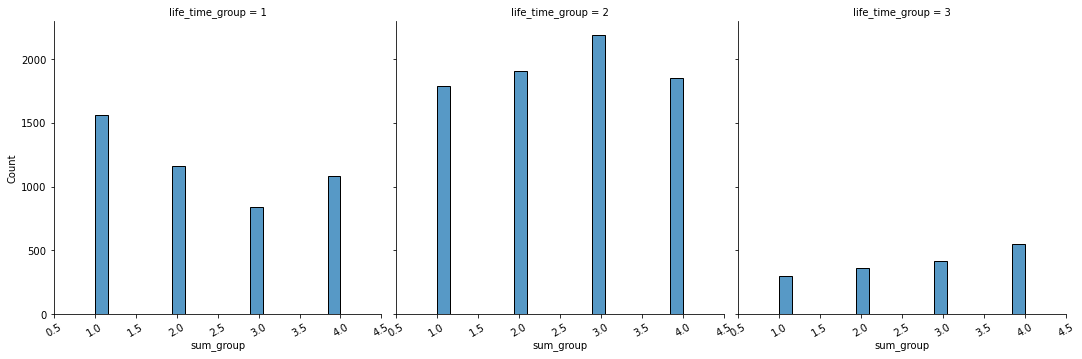

In [60]:
sns.displot(df, x='sum_group', col='life_time_group', multiple="dodge").set_xticklabels(rotation=30);

1)	выделить лайфтайм каждого донора  
2)	найти и проанализировать медианный лайфтайм за разные периоды и выбрать наиболее адекватный цели  
3)	обозначить границу через медианный лайфтайм  
4)	выбрать период (P) для «трека»: год, полгода, за всё время, медианный лайфтайм вех пользователей в этом году… что-то ещё…  
5)	найти трек: среднюю сумму пожертвований в месяц за период (P)  
6)	разбить выборку на 2015-2021 года – обучающую и валидационную, а 2022 год оставить на предсказания  


In [61]:
df['payment_date'] = pd.to_datetime(df['payment_date'])

In [62]:
# Разобьём данные на дф по полугодиям
df.query('payment_year==2016')['payment_date'].describe(datetime_is_numeric=True)

count                              761
mean     2016-07-04 01:04:20.183968512
min                2016-01-01 00:00:00
25%                2016-04-08 00:00:00
50%                2016-07-01 00:00:00
75%                2016-10-07 00:00:00
max                2016-12-31 00:00:00
Name: payment_date, dtype: object

In [63]:
df_2015_2 = df.query('payment_year==2015')
df_2016_1 = df.query('payment_date<"2016-06-01" and payment_year==2016')
df_2016_2 = df.query('payment_date>="2016-07-01" and payment_year==2016')
df_2017_1 = df.query('payment_date<"2017-07-01" and payment_year==2017')
df_2017_2 = df.query('payment_date>="2017-07-01" and payment_year==2017')
df_2018_1 = df.query('payment_date<"2018-07-01" and payment_year==2018')
df_2018_2 = df.query('payment_date>="2018-07-01" and payment_year==2018')
df_2019_1 = df.query('payment_date<"2019-07-01" and payment_year==2019')
df_2019_2 = df.query('payment_date>="2019-07-01" and payment_year==2019')
df_2020_1 = df.query('payment_date<"2020-07-01" and payment_year==2020')
df_2020_2 = df.query('payment_date>="2020-07-01" and payment_year==2020')
df_2021_1 = df.query('payment_date<"2021-07-01" and payment_year==2021')
df_2021_2 = df.query('payment_date>="2021-07-01" and payment_year==2021')
df_2022 = df.query('payment_year==2022')

In [64]:
dfs = [df_2015_2, 
       df_2016_1, df_2016_2,
       df_2017_1,df_2017_2,
       df_2018_1,df_2018_2,
       df_2019_1,df_2019_2,
       df_2020_1,df_2020_2,
       df_2021_1,df_2021_2,
       df_2022]


In [65]:
median_lifetime_by_period=[]
for d in dfs:
    median_lifetime_by_period.append(d['life_time'].median())
median_lifetime_by_period

[0.0,
 30.0,
 30.0,
 20.5,
 30.0,
 31.0,
 30.0,
 0.0,
 0.0,
 25.0,
 30.0,
 30.0,
 30.0,
 30.0]

In [66]:
df_2021_1.groupby('payment_month')['sum'].mean()

payment_month
1   1,111.03
2     857.01
3   1,172.06
4     892.62
5   1,153.08
6     822.74
Name: sum, dtype: float64

In [67]:
mean_month_sum=[]
for d in dfs:
    mean_month_sum.append(d.groupby('payment_month')['sum'].mean())
mean_month_sum

[payment_month
 7    5,624.24
 8      872.36
 9    1,344.75
 10   1,137.67
 11     799.63
 12   1,073.97
 Name: sum, dtype: float64,
 payment_month
 1     984.58
 2   1,969.83
 3   2,447.00
 4   1,643.75
 5   1,067.46
 Name: sum, dtype: float64,
 payment_month
 7    1,274.96
 8      785.96
 9      930.65
 10     767.21
 11     915.71
 12   1,079.41
 Name: sum, dtype: float64,
 payment_month
 1   1,191.04
 2     907.90
 3     821.43
 4   1,076.01
 5     460.13
 6     682.36
 Name: sum, dtype: float64,
 payment_month
 7    1,077.94
 8    1,973.68
 9      709.50
 10     925.23
 11     779.38
 12   1,465.82
 Name: sum, dtype: float64,
 payment_month
 1     761.18
 2     867.16
 3     820.76
 4   1,522.88
 5     952.58
 6   1,498.26
 Name: sum, dtype: float64,
 payment_month
 7      688.36
 8      681.34
 9      731.75
 10   1,111.25
 11   1,205.00
 12   1,272.17
 Name: sum, dtype: float64,
 payment_month
 1    4,733.50
 2   18,683.99
 3    1,350.49
 4      825.93
 5      732.09
 6    1,002

In [68]:
#def id_groupping_by_period(dfs):
#    data={}
for d in dfs:
    data=d.groupby('id').agg({'sum':'sum',
                               'life_time':'median',
                               'is_reccurent':'mean',
                               'is_woman':'first',
                               'is_city_mentioned':'first',
                               'purpose':('nunique','unique'),
                               'channel':'first',
                               'last_email_activity':'last',
                               'payment_date':'nunique'}).reset_index()
    display(data)


id      sum life_time is_reccurent  \
                                              sum    median         mean   
0   0329cf14-1f5b-4776-9a2a-5236b02cf6ac   222.00      0.00         1.00   
1   070f88c2-413c-4bfe-ba2f-bae3b3acf7a0 1,000.00      0.00         0.00   
2   0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0 5,000.00     30.00         1.00   
3   07923dbb-392d-4448-8117-e769f52aa476 1,200.00     30.00         1.00   
4   0867dfff-75bd-406b-80a6-979c66bdf208 4,000.00     30.00         1.00   
..                                   ...      ...       ...          ...   
87  e7f8b03e-ea74-4f0c-bfdc-1e86ae7a619e   100.00      0.00         1.00   
88  eb06e97c-1ac3-40fc-9fa7-23e2cde3b878 2,000.00     30.00         1.00   
89  efc184bd-199e-489f-bbd1-9da44de82d3d 2,500.00      0.00         0.00   
90  fc0ed0c4-f2c2-4a0f-8ec9-4159a60fe8ef   900.00     30.00         1.00   
91  fc9e24d5-abca-46a4-b4e2-08ea62be0f53   100.00      0.00         1.00   

   is_woman is_city_mentioned purpose                                channel  \
      first             first nunique             unique               first   
0         0                 0       1  [на работу фонда]  банковские карты     
1         1                 0       1  [на работу фонда]  банковские карты     
2         1                 0       1  [на работу фонда]  банковские карты     
3         1                 0       1  [на работу фонда]  банковские карты     
4         0                 0       1  [на работу фонда]  банковские карты     
..      ...               ...     ...                ...                 ...   
87        1                 0       1  [на работу фонда]  банковские карты     
88        0                 0       1  [на работу фонда]  банковские карты     
89        1                 0       1  [на работу фонда]  банковские карты     
90        1                 0       1  [на работу фонда]  банковские карты     
91        1                 0       1  [на работу фонда]  банковские карты     

   last_email_activity payment_date  
                  last      nunique  
0              no_info            1  
1           2022-07-18            1  
2           2022-07-19            5  
3           2022-07-18            4  
4           2022-07-18            4  
..                 ...          ...  
87          2022-07-18            1  
88          2022-07-18            4  
89             no_info            1  
90          2022-07-18            3  
91          2022-07-18            1  

[92 rows x 11 columns]

id       sum life_time is_reccurent  \
                                                sum    median         mean   
0    0389a57d-f570-4cae-9e32-24c4dc953bc9  5,000.00      0.00         0.00   
1    070f88c2-413c-4bfe-ba2f-bae3b3acf7a0  3,000.00    165.00         0.00   
2    0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0  5,000.00     31.00         1.00   
3    07923dbb-392d-4448-8117-e769f52aa476  1,500.00     31.00         1.00   
4    0867dfff-75bd-406b-80a6-979c66bdf208  2,000.00     31.00         1.00   
..                                    ...       ...       ...          ...   
102  f1cd9da5-a539-449e-be8e-bcd0fe3a13af  1,000.00      0.00         0.00   
103  f4771fd5-a811-43d1-82e9-b88aff28f3b5    200.00      0.00         0.00   
104  fa21f245-3870-425a-9508-adbd467aedde 10,000.00      0.00         0.00   
105  fc944e06-8683-4974-b1ea-8132590cbcdf 30,000.00      0.00         0.00   
106  fc9e24d5-abca-46a4-b4e2-08ea62be0f53    600.00     30.50         1.00   

    is_woman is_city_mentioned purpose                                channel  \
       first             first nunique             unique               first   
0          1                 0       1  [на работу фонда]  банковские карты     
1          1                 0       1  [на работу фонда]  банковские карты     
2          1                 0       1  [на работу фонда]  банковские карты     
3          1                 0       1  [на работу фонда]  банковские карты     
4          0                 0       1  [на работу фонда]  банковские карты     
..       ...               ...     ...                ...                 ...   
102        1                 0       1  [на работу фонда]  банковские карты     
103        0                 0       1  [на работу фонда]  банковские карты     
104        0                 0       1  [на работу фонда]  банковские карты     
105        1                 0       1  [на работу фонда]  банковские карты     
106        1                 0       1  [на работу фонда]  банковские карты     

    last_email_activity payment_date  
                   last      nunique  
0               no_info            1  
1            2022-07-18            1  
2            2022-07-19            5  
3            2022-07-18            5  
4            2022-07-18            2  
..                  ...          ...  
102          2022-07-19            1  
103          2022-07-18            1  
104          2022-07-18            1  
105          2022-07-18            1  
106          2022-07-18            6  

[107 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    070f88c2-413c-4bfe-ba2f-bae3b3acf7a0 2,500.00    154.00            0   
1    0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0 4,000.00     31.00            1   
2    07923dbb-392d-4448-8117-e769f52aa476 1,800.00     30.50            1   
3    08002577-f952-468b-b709-960613f2f5ec   700.00      0.00            0   
4    0b6da68c-558b-4153-806e-b1d775585b88   500.00     31.00            1   
..                                    ...      ...       ...          ...   
105  ef2981a6-9cfa-472d-9e6b-a21b75cb699e 1,000.00      0.00            0   
106  f4771fd5-a811-43d1-82e9-b88aff28f3b5   300.00     65.00            0   
107  f66cefef-38bb-4e7a-a795-207e19a03005 4,000.00     15.00            1   
108  f92ddf35-c7c0-4ab1-9097-b612ce6ed534 5,000.00      0.00            0   
109  fe2bd582-879f-4314-97c0-2b3b17cc56cd 1,000.00      0.00            0   

    is_woman is_city_mentioned purpose                                channel  \
       first             first nunique             unique               first   
0          1                 0       1  [на работу фонда]  банковские карты     
1          1                 0       1  [на работу фонда]  банковские карты     
2          1                 0       1  [на работу фонда]  банковские карты     
3          1                 0       1  [на работу фонда]  банковские карты     
4          1                 0       1  [на работу фонда]  банковские карты     
..       ...               ...     ...                ...                 ...   
105        1                 0       1  [на работу фонда]  банковские карты     
106        0                 0       1  [на работу фонда]  банковские карты     
107        0                 0       1  [на работу фонда]  банковские карты     
108        1                 0       1  [на работу фонда]  банковские карты     
109        1                 0       1  [на работу фонда]  банковские карты     

    last_email_activity payment_date  
                   last      nunique  
0            2022-07-18            1  
1            2022-07-19            4  
2            2022-07-18            6  
3            2022-07-18            1  
4            2022-07-18            5  
..                  ...          ...  
105          2022-07-18            1  
106          2022-07-18            1  
107          2022-07-18            2  
108          2022-07-19            1  
109          2022-07-18            1  

[110 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    002cb994-10cd-45e9-b6ed-ed7f3c90d7a9 1,000.00      0.00         0.00   
1    05d8fd34-e9fc-4118-a304-1da9463dcb37   200.00      0.00         0.00   
2    0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0 6,000.00     31.00         1.00   
3    07923dbb-392d-4448-8117-e769f52aa476 1,800.00     31.00         1.00   
4    079295b8-9f15-4c73-95da-c66018381eb6   100.00      0.00         0.00   
..                                    ...      ...       ...          ...   
388  fd2f2946-d2dd-4200-9c01-34118711bc97   500.00      0.00         0.00   
389  fe9b0d15-92f8-4dc8-8692-aa5097b43338    20.00      0.00         0.00   
390  ff39aa18-1061-48f7-8284-058eea55e7d1   200.00      0.00         0.00   
391  ff5105c3-51f6-485c-986e-6e70c202f6dd   200.00      0.00         0.00   
392  ffebaa14-fde5-4a6d-9363-fe84a18d68bc   500.00      0.00         0.00   

    is_woman is_city_mentioned purpose                                channel  \
       first             first nunique             unique               first   
0          1                 0       1  [на работу фонда]  банковские карты     
1          1                 0       1  [на работу фонда]  банковские карты     
2          1                 0       1  [на работу фонда]  банковские карты     
3          1                 0       1  [на работу фонда]  банковские карты     
4    no_info                 0       1          [no_info]               sms     
..       ...               ...     ...                ...                 ...   
388        1                 0       1  [на работу фонда]  банковские карты     
389  no_info                 0       1          [no_info]               sms     
390  no_info                 0       1  [на работу фонда]  банковские карты     
391        1                 0       1  [на работу фонда]  банковские карты     
392        0                 0       1  [на работу фонда]  банковские карты     

    last_email_activity payment_date  
                   last      nunique  
0            2022-07-18            1  
1               no_info            1  
2            2022-07-19            6  
3            2022-07-18            6  
4               no_info            1  
..                  ...          ...  
388          2022-07-18            1  
389             no_info            1  
390          2022-07-18            1  
391          2022-07-19            1  
392          2022-07-18            1  

[393 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    009fa801-1558-4699-b0fe-8debbf161195   100.00      0.00         0.00   
1    056f2327-74d9-4edb-b891-272959834907 2,000.00      0.00         0.00   
2    0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0 6,000.00     30.50         1.00   
3    07923dbb-392d-4448-8117-e769f52aa476 1,800.00     30.50         1.00   
4    0842e234-8e70-40cf-8f22-17b5e25beb2b 1,800.00     31.00         1.00   
..                                    ...      ...       ...          ...   
173  f66cefef-38bb-4e7a-a795-207e19a03005 2,000.00    153.00         1.00   
174  f71761a8-a2b1-4ec1-b068-3ac66d80e171   500.00      0.00         0.00   
175  f7716d6a-c747-4894-b4d6-18a883b38c5b 3,000.00     31.00         1.00   
176  f7e0d2ff-f051-46c2-8514-afa947e29f48 5,000.00      0.00         0.00   
177  fe5b0a5b-0363-4b4b-8652-b95912076fd8   800.00     30.00         1.00   

    is_woman is_city_mentioned purpose                                channel  \
       first             first nunique             unique               first   
0    no_info                 0       1          [no_info]               sms     
1          1                 0       1  [на работу фонда]  банковские карты     
2          1                 0       1  [на работу фонда]  банковские карты     
3          1                 0       1  [на работу фонда]  банковские карты     
4          0                 0       1  [на работу фонда]  банковские карты     
..       ...               ...     ...                ...                 ...   
173        0                 0       1  [на работу фонда]  банковские карты     
174        1                 0       1  [на работу фонда]  банковские карты     
175        1                 0       1  [на работу фонда]  банковские карты     
176        0                 0       1  [на работу фонда]  банковские карты     
177        1                 0       1  [на работу фонда]  банковские карты     

    last_email_activity payment_date  
                   last      nunique  
0               no_info            1  
1            2022-07-18            1  
2            2022-07-19            6  
3            2022-07-18            6  
4            2022-07-18            6  
..                  ...          ...  
173          2022-07-18            1  
174          2022-07-18            1  
175          2022-07-18            6  
176          2022-07-18            1  
177          2022-07-18            4  

[178 rows x 11 columns]

id       sum life_time is_reccurent  \
                                                sum    median         mean   
0    023d091a-a0ac-4c27-9122-39034ff127c6  1,000.00      0.00         0.00   
1    02af4091-407e-44e0-b547-eac79c0ba1e4 10,000.00      0.00         0.00   
2    0394387c-fa34-432f-8050-d062188629b9  1,000.00      0.00         1.00   
3    0729521e-f5ef-44f5-bdfe-f4c5e56bb7e0  3,000.00     31.00         1.00   
4    07923dbb-392d-4448-8117-e769f52aa476    900.00     31.00         1.00   
..                                    ...       ...       ...          ...   
134  f35203c3-672c-4cb8-9efc-6c370fb71fd1  1,000.00     71.00         0.00   
135  f66cefef-38bb-4e7a-a795-207e19a03005  2,000.00     61.00         1.00   
136  f7716d6a-c747-4894-b4d6-18a883b38c5b  2,500.00     31.00         1.00   
137  fcb8b90d-15ff-4409-b049-33f39429a6cd 50,000.00      0.00         0.00   
138  fe5b0a5b-0363-4b4b-8652-b95912076fd8    400.00     31.00         1.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0    no_info                 0       1  [адресное пожертвование]   
1          1                 0       1                 [no_info]   
2          0                 0       1         [на работу фонда]   
3          1                 0       1         [на работу фонда]   
4          1                 0       1         [на работу фонда]   
..       ...               ...     ...                       ...   
134        1                 0       1         [на работу фонда]   
135        0                 0       1         [на работу фонда]   
136        1                 0       1         [на работу фонда]   
137        0                 0       1  [адресное пожертвование]   
138        1                 0       1         [на работу фонда]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0    банковские карты            2022-07-18            1  
1    банковские карты            2022-07-11            1  
2    банковские карты            2022-07-18            1  
3    банковские карты            2022-07-19            3  
4    банковские карты            2022-07-18            3  
..                  ...                 ...          ...  
134  банковские карты            2022-07-18            2  
135  банковские карты            2022-07-18            1  
136  банковские карты            2022-07-18            5  
137  банковские карты               no_info            1  
138  банковские карты            2022-07-18            2  

[139 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    0357f974-9460-450d-bb99-452083c08bbb 1,000.00      0.00         0.00   
1    0394387c-fa34-432f-8050-d062188629b9 2,000.00     30.50         1.00   
2    05b8107b-349d-440b-92b0-ef081b5065a3 2,500.00      0.00         1.00   
3    07923dbb-392d-4448-8117-e769f52aa476 5,000.00    269.00         0.00   
4    086a235a-ed54-4480-8248-6df9df327db2 1,000.00      0.00         0.00   
..                                    ...      ...       ...          ...   
126  f4bd4288-02b0-4c13-aacb-3bbb09838b34   500.00      0.00         0.00   
127  f540795b-ff93-4cde-9f21-e8c937fa255c   500.00      0.00         0.00   
128  f5ec8304-3854-43e1-8d5a-9591ebde6bc3   100.00      0.00         0.00   
129  f6f56272-a3e8-44bf-89ce-90f43b49101e   500.00      0.00         0.00   
130  fd96893a-58d9-4b07-a493-d50e6ea87f97    30.00      0.00         1.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1            [на программу]   
1          0                 0       1         [на работу фонда]   
2          0                 1       1  [адресное пожертвование]   
3          1                 0       1            [на программу]   
4          1                 0       1            [на программу]   
..       ...               ...     ...                       ...   
126  no_info                 0       1  [адресное пожертвование]   
127        1                 0       1                 [no_info]   
128        1                 0       1            [на программу]   
129        1                 0       1                 [no_info]   
130        1                 0       1  [адресное пожертвование]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0    банковские карты            2022-07-20            1  
1    банковские карты            2022-07-18            2  
2    банковские карты            2022-07-18            1  
3    банковские карты            2022-07-18            1  
4    банковские карты            2022-07-18            1  
..                  ...                 ...          ...  
126  банковские карты            2020-04-18            1  
127  банковские карты            2022-07-18            1  
128  банковские карты            2022-07-18            1  
129  банковские карты            2022-07-18            1  
130  банковские карты            2022-07-18            1  

[131 rows x 11 columns]

id    sum life_time is_reccurent  \
                                             sum    median         mean   
0    0001afdd-94e3-48f3-b5e7-d5539700425e 100.00      0.00         0.00   
1    006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a 200.00      0.00         0.00   
2    00ca48e7-c9ab-4167-8261-3ed59fdf40ff 100.00      0.00         0.00   
3    013339e3-2ca6-4bed-9efe-37b65e0d4106 150.00      0.00         0.00   
4    015d99d6-6929-41e4-9bcb-0ce4406e6729 200.00      0.00         0.00   
..                                    ...    ...       ...          ...   
809  ff6f256c-b2b3-43e1-90ea-a2cde83f8336 100.00      0.00         0.00   
810  ff7e2270-b638-4e94-9391-e8cf3f97e216 100.00      0.00         0.00   
811  ff89a944-e834-416e-98f0-3f792476aa95 100.00      0.00         0.00   
812  ff946fd1-eef8-4541-a906-bae64527aaa5  50.00      0.00         0.00   
813  ffb1c4fa-f950-4bb7-a1f2-9dd655298fff 100.00      0.00         0.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0    no_info                 0       1                 [no_info]   
1    no_info                 0       1                 [no_info]   
2    no_info                 0       1                 [no_info]   
3          0                 0       1  [адресное пожертвование]   
4    no_info                 0       1                 [no_info]   
..       ...               ...     ...                       ...   
809  no_info                 0       1                 [no_info]   
810  no_info                 0       1                 [no_info]   
811  no_info                 0       1                 [no_info]   
812  no_info                 0       1                 [no_info]   
813  no_info                 0       1                 [no_info]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0                 sms               no_info            1  
1                 sms               no_info            1  
2                 sms               no_info            1  
3    банковские карты            2022-07-18            1  
4                 sms               no_info            1  
..                  ...                 ...          ...  
809               sms               no_info            1  
810               sms               no_info            1  
811               sms               no_info            1  
812               sms               no_info            1  
813               sms               no_info            1  

[814 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    008883d4-0182-4a4d-942c-4e55328a2c38 1,000.00      0.00         0.00   
1    008ff16b-30c0-4b44-9141-10f9bab17901    50.00      0.00         0.00   
2    00adba34-1edc-4652-a559-1c0be379a0da   500.00      0.00         0.00   
3    00e4695c-d610-48f7-9e9b-b96fe4805c1d 1,000.00      0.00         0.00   
4    012dfc9b-bf39-40bc-987a-f02eeed039a9   300.00      0.00         0.00   
..                                    ...      ...       ...          ...   
857  fee4bad2-de40-4fe6-8515-6c579a28dda1 3,000.00     31.00         1.00   
858  ff03eca7-91fb-4494-910e-b25353f46256 1,000.00      0.00         0.00   
859  ff331e7f-f975-46e4-9754-a13b661ef5c5 1,000.00      0.00         0.00   
860  ff3f49d9-22a7-4d12-94db-5b921b83cd89   100.00      0.00         0.00   
861  ff843e60-6816-450d-a3bd-2ad290cf3b8b   500.00      0.00         0.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1    no_info                 0       1                 [no_info]   
2          1                 1       1  [адресное пожертвование]   
3          1                 0       1  [адресное пожертвование]   
4    no_info                 0       1                 [no_info]   
..       ...               ...     ...                       ...   
857        0                 0       1  [адресное пожертвование]   
858        1                 0       1  [адресное пожертвование]   
859        0                 1       1  [адресное пожертвование]   
860        1                 0       1  [адресное пожертвование]   
861  no_info                 0       1                 [no_info]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0    банковские карты            2022-07-19            1  
1                 sms               no_info            1  
2    банковские карты            2022-07-19            1  
3    банковские карты            2022-06-09            1  
4                 sms               no_info            1  
..                  ...                 ...          ...  
857  банковские карты            2022-07-18            6  
858  банковские карты            2022-07-18            1  
859  банковские карты            2022-07-18            1  
860  банковские карты            2022-07-22            1  
861               sms               no_info            1  

[862 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    000711b2-2785-461b-bf5b-5cb7d2caba20 1,500.00     29.00         1.00   
1    00adba34-1edc-4652-a559-1c0be379a0da   500.00    197.00         0.00   
2    00b01874-b85a-4e15-8888-f38cb255fa76   300.00     30.00         1.00   
3    00b19e9c-a613-43df-9a72-0aa0ddaf8a8b   150.00      0.00         0.00   
4    013339e3-2ca6-4bed-9efe-37b65e0d4106   300.00    112.00         0.00   
..                                    ...      ...       ...          ...   
696  fd96893a-58d9-4b07-a493-d50e6ea87f97   180.00     31.00         1.00   
697  fee4bad2-de40-4fe6-8515-6c579a28dda1 3,000.00     30.50         1.00   
698  fee7b479-dfec-489d-8490-d6fc04bd7860   300.00     30.00         1.00   
699  ff648c4c-4afe-4184-b2c3-bb763e6c0a75   100.00      0.00         0.00   
700  ffa30123-a516-44a7-b030-f83ed369b645   800.00     15.00         1.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1          1                 1       1  [адресное пожертвование]   
2          1                 0       1  [адресное пожертвование]   
3    no_info                 0       1  [адресное пожертвование]   
4          0                 0       1  [адресное пожертвование]   
..       ...               ...     ...                       ...   
696        1                 0       1  [адресное пожертвование]   
697        0                 0       1  [адресное пожертвование]   
698        1                 1       1  [адресное пожертвование]   
699  no_info                 0       1                 [no_info]   
700        1                 1       1  [адресное пожертвование]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0    банковские карты            2022-07-27            3  
1    банковские карты            2022-07-19            1  
2    банковские карты            2022-07-18            3  
3                 sms               no_info            1  
4    банковские карты            2022-07-18            1  
..                  ...                 ...          ...  
696  банковские карты            2022-07-18            6  
697  банковские карты            2022-07-18            6  
698  банковские карты            2022-07-18            3  
699               sms               no_info            1  
700  банковские карты            2022-07-18            6  

[701 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    000711b2-2785-461b-bf5b-5cb7d2caba20 2,500.00     31.00         1.00   
1    00b01874-b85a-4e15-8888-f38cb255fa76   400.00     31.00         1.00   
2    01693e9d-1d01-4f1f-b495-9457b346db0d   300.00    255.00         0.00   
3    02764ca8-476d-42d1-82fb-8ebb8da6f0f9   100.00      0.00         0.00   
4    02e2115f-1ea4-4054-8278-261cd396a96d 1,000.00      0.00         0.00   
..                                    ...      ...       ...          ...   
581  fe72a4c1-1494-4be0-b9be-76d1a1f746d6   200.00      0.00         1.00   
582  fee4bad2-de40-4fe6-8515-6c579a28dda1 3,000.00     30.00         1.00   
583  fee7b479-dfec-489d-8490-d6fc04bd7860   600.00     30.50         1.00   
584  ff8daa4d-f7de-490a-aa62-d982fe587e4d    50.00      0.00         0.00   
585  ffa30123-a516-44a7-b030-f83ed369b645 1,500.00     23.00         1.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1          1                 0       1  [адресное пожертвование]   
2          1                 0       1  [адресное пожертвование]   
3          1                 0       1  [адресное пожертвование]   
4          1                 1       1  [адресное пожертвование]   
..       ...               ...     ...                       ...   
581        1                 1       1  [адресное пожертвование]   
582        0                 0       1  [адресное пожертвование]   
583        1                 1       1  [адресное пожертвование]   
584        1                 1       1  [адресное пожертвование]   
585        1                 1       1  [адресное пожертвование]   

                          channel last_email_activity payment_date  
                            first                last      nunique  
0              банковские карты            2022-07-27            5  
1              банковские карты            2022-07-18            4  
2                           sms            2022-07-18            1  
3    прямые поступления на счет               no_info            1  
4              банковские карты            2022-07-18            1  
..                            ...                 ...          ...  
581            банковские карты            2022-07-28            1  
582            банковские карты            2022-07-18            6  
583            банковские карты            2022-07-18            6  
584  прямые поступления на счет               no_info            1  
585            банковские карты            2022-07-18           10  

[586 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    000711b2-2785-461b-bf5b-5cb7d2caba20 2,500.00     31.00         1.00   
1    00adba34-1edc-4652-a559-1c0be379a0da   300.00    341.00         0.00   
2    02e2115f-1ea4-4054-8278-261cd396a96d 1,000.00    195.00         0.00   
3    040850b0-b542-4760-ad77-253e56e1b3f7   150.00      0.00         0.00   
4    04c6b221-1556-4aa6-8554-5a995bb41db0 7,000.00      4.50         0.00   
..                                    ...      ...       ...          ...   
559  fd96893a-58d9-4b07-a493-d50e6ea87f97    30.00     31.00         1.00   
560  fe72a4c1-1494-4be0-b9be-76d1a1f746d6 1,200.00     31.00         1.00   
561  fee4bad2-de40-4fe6-8515-6c579a28dda1 3,000.00     31.00         1.00   
562  fee7b479-dfec-489d-8490-d6fc04bd7860   600.00     31.00         1.00   
563  ffa30123-a516-44a7-b030-f83ed369b645 1,000.00      9.00         0.86   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1          1                 1       1  [адресное пожертвование]   
2          1                 1       1  [адресное пожертвование]   
3          1                 1       1  [адресное пожертвование]   
4          0                 1       1  [адресное пожертвование]   
..       ...               ...     ...                       ...   
559        1                 0       1  [адресное пожертвование]   
560        1                 1       1  [адресное пожертвование]   
561        0                 0       1  [адресное пожертвование]   
562        1                 1       1  [адресное пожертвование]   
563        1                 1       1  [адресное пожертвование]   

                channel last_email_activity payment_date  
                  first                last      nunique  
0    банковские карты            2022-07-27            5  
1    банковские карты            2022-07-19            1  
2    банковские карты            2022-07-18            1  
3    банковские карты            2022-07-18            1  
4    банковские карты            2022-07-18            2  
..                  ...                 ...          ...  
559  банковские карты            2022-07-18            1  
560  банковские карты            2022-07-28            6  
561  банковские карты            2022-07-18            6  
562  банковские карты            2022-07-18            6  
563  банковские карты            2022-07-18            6  

[564 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    000711b2-2785-461b-bf5b-5cb7d2caba20 2,000.00     31.00         1.00   
1    0015a100-2d8c-4262-a9b3-bb1461c0c8b8   400.00      0.00         0.00   
2    01693e9d-1d01-4f1f-b495-9457b346db0d   200.00    357.00         0.00   
3    02771765-505e-4e95-8fbd-531f936f50c8   148.00      0.00         0.00   
4    0376aaf4-2659-42f7-ae05-2e510c3f56ed   300.00      0.00         0.00   
..                                    ...      ...       ...          ...   
538  fe72a4c1-1494-4be0-b9be-76d1a1f746d6 1,000.00     31.00         1.00   
539  fee4bad2-de40-4fe6-8515-6c579a28dda1 3,000.00     30.50         1.00   
540  fee7b479-dfec-489d-8490-d6fc04bd7860 1,200.00     28.00         1.00   
541  ff331e7f-f975-46e4-9754-a13b661ef5c5 1,000.00    671.00         0.00   
542  ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7    60.00      6.00         0.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1          1                 1       1  [адресное пожертвование]   
2          1                 0       1  [адресное пожертвование]   
3          1                 1       1  [адресное пожертвование]   
4          1                 1       1  [адресное пожертвование]   
..       ...               ...     ...                       ...   
538        1                 1       1  [адресное пожертвование]   
539        0                 0       1  [адресное пожертвование]   
540        1                 1       1  [адресное пожертвование]   
541        0                 1       1  [адресное пожертвование]   
542        1                 0       1  [адресное пожертвование]   

                          channel last_email_activity payment_date  
                            first                last      nunique  
0              банковские карты            2022-07-27            4  
1              банковские карты            2022-07-18            1  
2                           sms            2022-07-18            1  
3              банковские карты            2022-07-18            1  
4              банковские карты            2022-07-18            1  
..                            ...                 ...          ...  
538            банковские карты            2022-07-28            5  
539            банковские карты            2022-07-18            6  
540            банковские карты            2022-07-18           10  
541            банковские карты            2022-07-18            1  
542  прямые поступления на счет               no_info            3  

[543 rows x 11 columns]

id      sum life_time is_reccurent  \
                                               sum    median         mean   
0    000711b2-2785-461b-bf5b-5cb7d2caba20 2,000.00     30.50         1.00   
1    00adba34-1edc-4652-a559-1c0be379a0da   300.00    408.00         0.00   
2    0112fa48-d41e-44fe-98d5-734826ce1e7c    77.00      0.00         0.00   
3    013b1fc5-0c11-4b4a-b28a-183dcc530a02 1,000.00      0.00         0.00   
4    02e2115f-1ea4-4054-8278-261cd396a96d 1,000.00    329.00         0.00   
..                                    ...      ...       ...          ...   
476  fc1eb8bd-b30f-47a8-b347-0200183861d8     0.22      0.00         0.00   
477  fd111b94-0e78-4440-bea2-56fb2697f647 1,000.00     15.50         1.00   
478  fd7388f4-d9b2-4567-8995-e1ba5c0e3ba9 4,000.00    171.50         0.00   
479  fee7b479-dfec-489d-8490-d6fc04bd7860 1,600.00      3.00         1.00   
480  ffa30123-a516-44a7-b030-f83ed369b645   800.00     31.00         1.00   

    is_woman is_city_mentioned purpose                            \
       first             first nunique                    unique   
0          1                 0       1  [адресное пожертвование]   
1          1                 1       1  [адресное пожертвование]   
2          0                 0       1  [адресное пожертвование]   
3          0                 1       1         [на работу фонда]   
4          1                 1       1  [адресное пожертвование]   
..       ...               ...     ...                       ...   
476        1                 0       1  [адресное пожертвование]   
477        1                 0       1  [адресное пожертвование]   
478        1                 1       1  [адресное пожертвование]   
479        1                 1       1  [адресное пожертвование]   
480        1                 1       1  [адресное пожертвование]   

                          channel last_email_activity payment_date  
                            first                last      nunique  
0              банковские карты            2022-07-27            4  
1              банковские карты            2022-07-19            1  
2    прямые поступления на счет               no_info            1  
3              банковские карты            2022-07-11            1  
4              банковские карты            2022-07-18            1  
..                            ...                 ...          ...  
476  прямые поступления на счет               no_info            1  
477            банковские карты            2022-07-20            4  
478            банковские карты            2022-07-18            2  
479            банковские карты            2022-07-18           13  
480            банковские карты            2022-07-18            4  

[481 rows x 11 columns]

dfs = {
    2015: [df_2015_2], 
    2016: [df_2016_1, df_2016_2],
    2017: [df_2017_1,df_2017_2],
    2018: [df_2018_1,df_2018_2],
    2019: [df_2019_1,df_2019_2],
    2020: [df_2020_1,df_2020_2],
    2021: [df_2021_1,df_2021_2],
    2022: [df_2022]
}


## KMeans

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore') # уберём предупреждения

              total_sum  median_life_time  is_reccurent_mean  \
cluster_km                                                     
0              2,473.45              2.05               0.01   
1             15,117.72             29.60               0.94   
2             14,290.04            100.66               0.03   
3          2,569,494.50             15.25               0.22   

            different_purposes_count  payments_count  \
cluster_km                                             
0                               1.00            1.12   
1                               1.11           18.79   
2                               1.40            5.22   
3                               2.00           24.50   

            delta_lifetime_decrease_mean  delta_sum_increase_mean  
cluster_km                                                         
0                                   0.97                     1.00  
1                                   0.55                     0.98  
2     

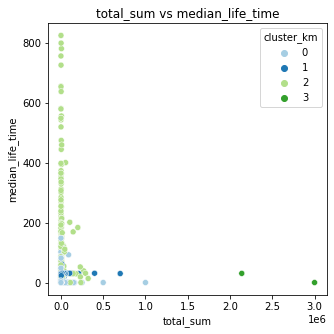

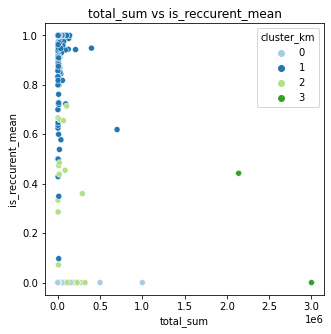

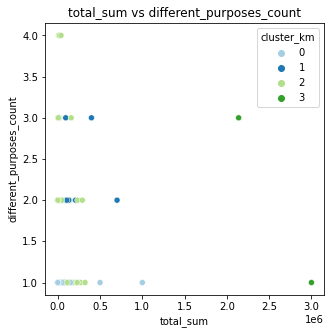

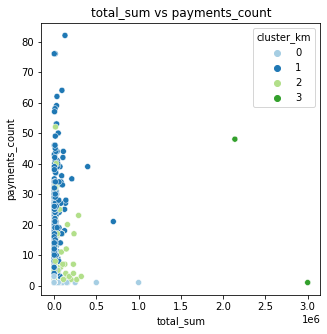

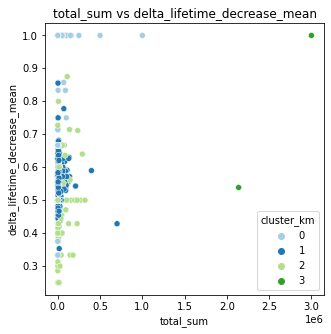

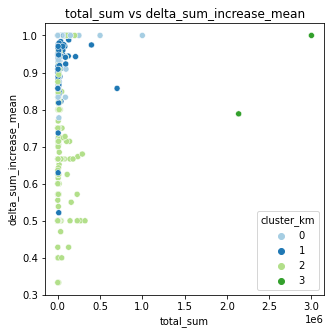

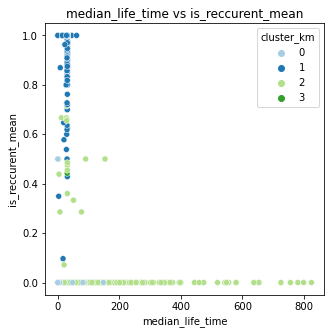

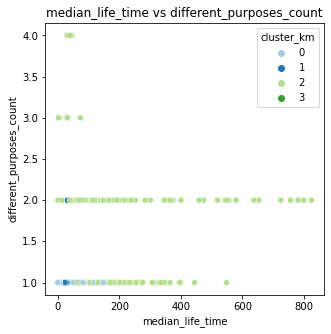

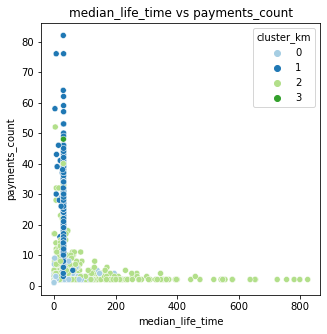

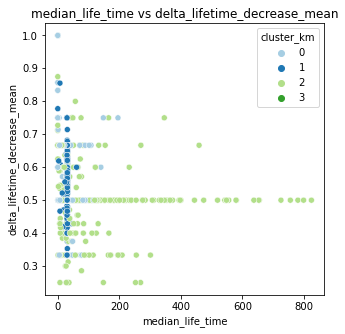

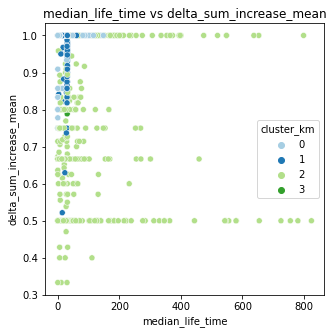

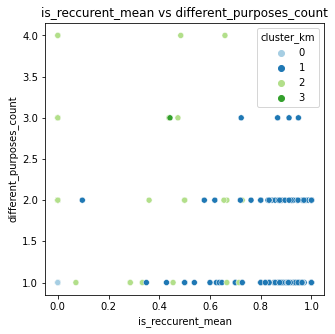

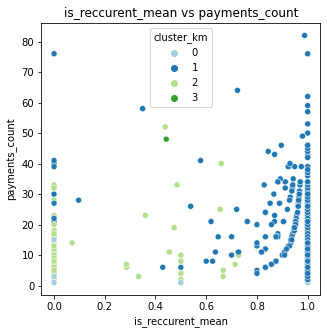

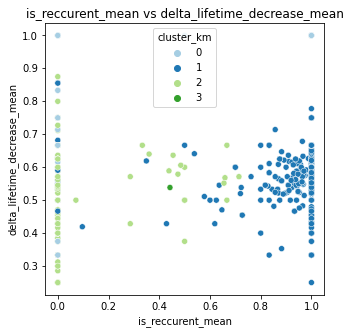

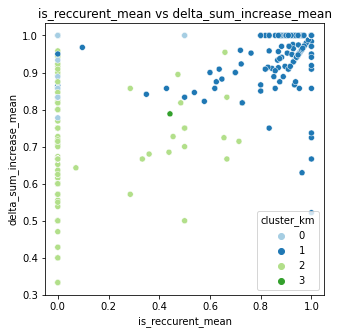

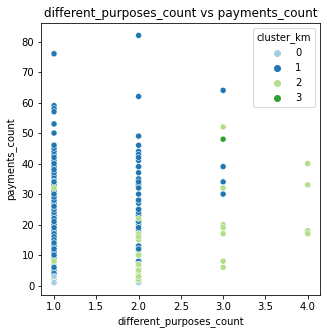

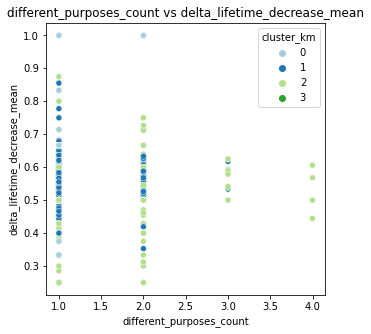

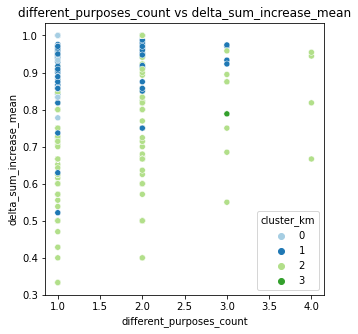

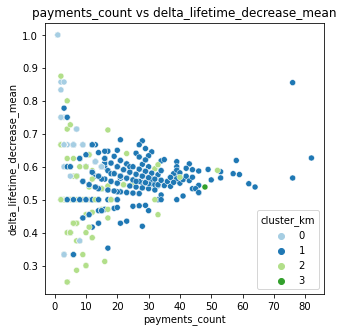

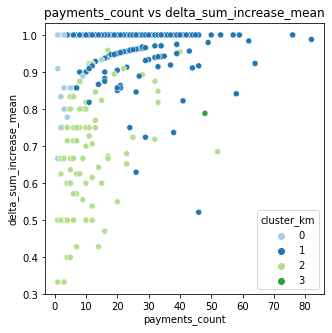

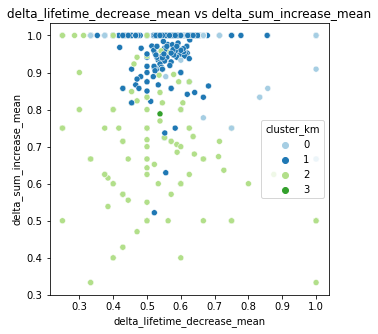

Silhouette_score: 0.77


In [70]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(df_for_model)

# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df_for_model['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
print(df_for_model.groupby('cluster_km').mean())

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(df_for_model.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df_for_model, pair[0], pair[1], 'cluster_km')

# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

In [71]:
df_for_model

,total_sum,median_life_time,is_reccurent_mean,different_purposes_count,payments_count,delta_lifetime_decrease_mean,delta_sum_increase_mean,cluster_km
id,,,,,,,,
0001afdd-94e3-48f3-b5e7-d5539700425e,100.00,0.00,0.00,1,1,1.00,1.00,0
000711b2-2785-461b-bf5b-5cb7d2caba20,"10,500.00",31.00,1.00,1,21,0.52,1.00,1
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,400.00,0.00,0.00,1,1,1.00,1.00,0
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,"1,000.00",0.00,0.00,1,1,1.00,1.00,0
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,200.00,0.00,0.00,1,1,1.00,1.00,0
...,...,...,...,...,...,...,...,...
ff946fd1-eef8-4541-a906-bae64527aaa5,50.00,0.00,0.00,1,1,1.00,1.00,0
ffa30123-a516-44a7-b030-f83ed369b645,"4,100.00",23.00,0.96,1,26,0.56,0.63,1
ffb1c4fa-f950-4bb7-a1f2-9dd655298fff,100.00,0.00,0.00,1,1,1.00,1.00,0


In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage 

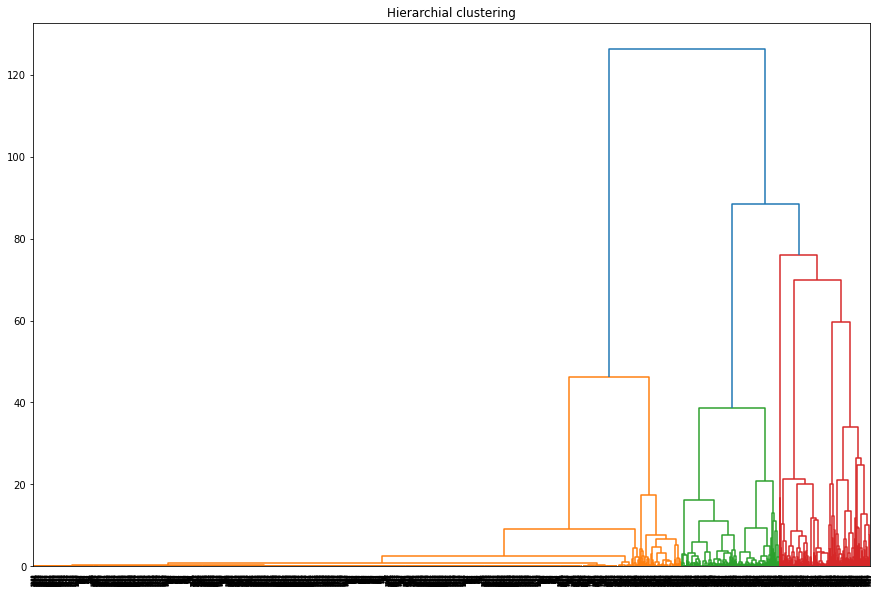

In [74]:
X_sc = sc.fit_transform(df_for_model.drop(columns='cluster_km'))

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show() 